## 라이브러리 로드

In [ ]:
# pandas, seaborn, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(pd.__version__)
print(sns.__version__)

1.3.5
0.11.2


In [ ]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [ ]:
# sns.load_dataset??

In [ ]:
# mpg 데이터셋을 불러옵니다.
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [ ]:
# head
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
# tail
df.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

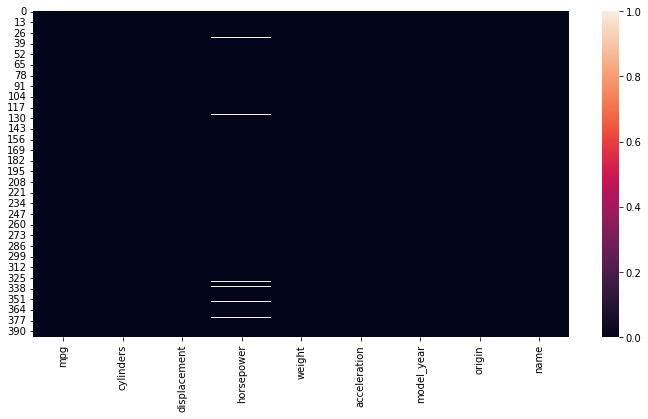

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())

## 기술통계

In [ ]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [ ]:
# nunique 값 구하기
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

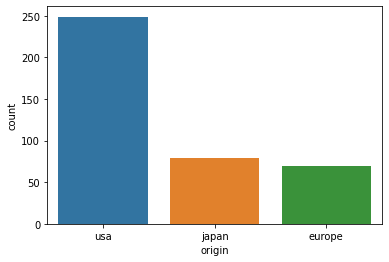

In [ ]:
# countplot 으로 origin 빈도수 시각화 하기
sns.countplot(data=df, x="origin")

### 1개 변수의 빈도수

In [ ]:
# origin 의 빈도수 구하기
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

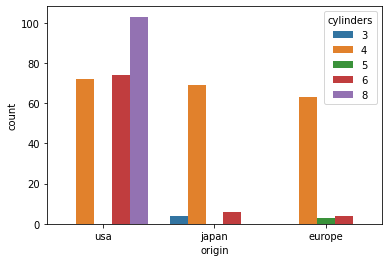

In [ ]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data=df, x="origin", hue="cylinders")

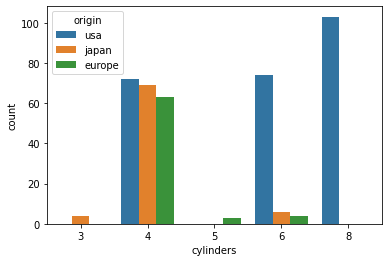

In [ ]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data=df, x="cylinders", hue="origin")

In [ ]:
df["origin"]

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [ ]:
pd.crosstab(df.origin, df.cylinders)

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [ ]:
# pd.crosstab 으로 시각화한 값 직접 구하기
pd.crosstab(df["origin"], df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [ ]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 범주형 vs 수치형 변수

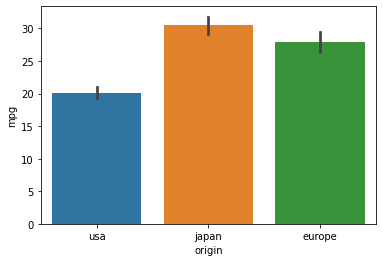

In [ ]:
# barplot 으로 origin 별 mpg 값 구하기
sns.barplot(data=df, x="origin", y="mpg")

### groupby 를 통한 연산

In [ ]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
df.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [ ]:
df.groupby("origin")["mpg"].agg(["mean", "count", "sum"])

,mean,count,sum
origin,,,
europe,27.891429,70,1952.4
japan,30.450633,79,2405.6
usa,20.083534,249,5000.8


In [ ]:
df.groupby("origin").agg({"mpg":"sum", "cylinders":"mean"})

,mpg,cylinders
origin,,
europe,1952.4,4.157143
japan,2405.6,4.101266
usa,5000.8,6.248996


### pivot table을 통한 연산

In [ ]:
# pivot_table 로 같은 값 구하기
pd.pivot_table(data=df, index="origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [ ]:

pd.pivot_table(data=df, index="origin", values="mpg", aggfunc=["count", "sum", "mean"])

,count,sum,mean
,mpg,mpg,mpg
origin,,,
europe,70,1952.4,27.891429
japan,79,2405.6,30.450633
usa,249,5000.8,20.083534


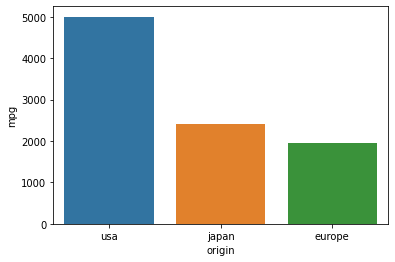

In [ ]:
# barplot 으로 합계 값 구하기
sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum, ci=None)

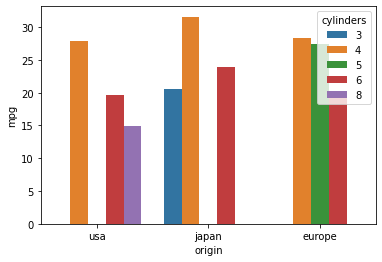

In [ ]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df, x="origin", y="mpg", hue="cylinders", ci=None)

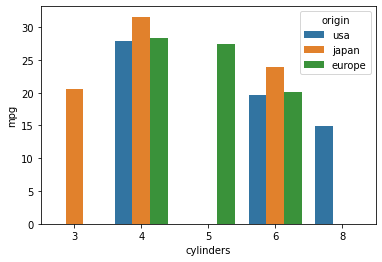

In [ ]:

sns.barplot(data=df, x="cylinders", y="mpg", hue="origin", ci=None)

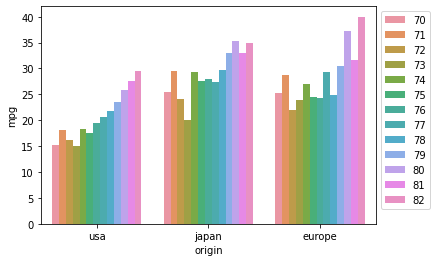

In [ ]:
sns.barplot(data=df, x="origin", y="mpg", hue="model_year", ci=None)
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
df.groupby(by=["origin", "cylinders"])["mpg"].mean()

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

In [ ]:
df.groupby(by=["origin", "cylinders"])["mpg"].mean().unstack()

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,28.411111,27.366667,20.100000,NaN
japan,20.55,31.595652,NaN,23.883333,NaN
usa,NaN,27.840278,NaN,19.663514,14.963107


In [ ]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data=df, index=["origin", "cylinders"], values="mpg")

mpg
origin cylinders           
europe 4          28.411111
       5          27.366667
       6          20.100000
japan  3          20.550000
       4          31.595652
       6          23.883333
usa    4          27.840278
       6          19.663514
       8          14.963107

In [ ]:
pd.pivot_table(data=df, index="origin", columns="cylinders", values="mpg")

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,28.411111,27.366667,20.100000,NaN
japan,20.55,31.595652,NaN,23.883333,NaN
usa,NaN,27.840278,NaN,19.663514,14.963107


In [ ]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화


### boxplot과 사분위수

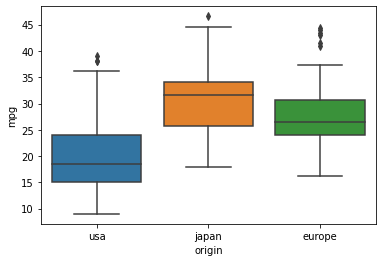

In [ ]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df, x="origin", y="mpg")

In [ ]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
desc = df.groupby("origin")["mpg"].describe()
desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [ ]:
europe = desc.loc["europe"]
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [ ]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3 = europe["75%"]
Q1 = europe["25%"]
IQR = Q3 - Q1
OUT_MAX = Q3 + (1.5 * IQR)
OUT_MIN = Q1 - (1.5 * IQR)
Q3, Q1, IQR, OUT_MAX, OUT_MIN

(30.65, 24.0, 6.649999999999999, 40.625, 14.025000000000002)

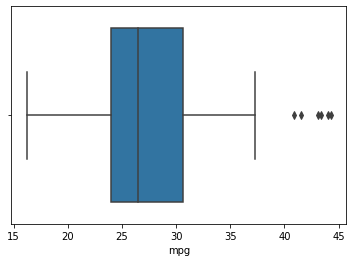

In [ ]:
# europe 에 해당되는 값에 대해 boxplot 그리기
df_europe = df[df["origin"] == "europe"]
sns.boxplot(data=df_europe, x="mpg")

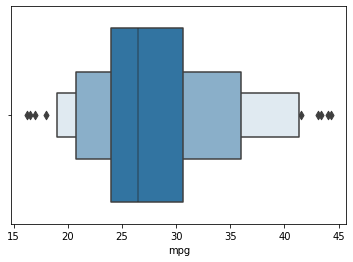

In [ ]:
# boxenplot 그리기

sns.boxenplot(data=df_europe, x="mpg")

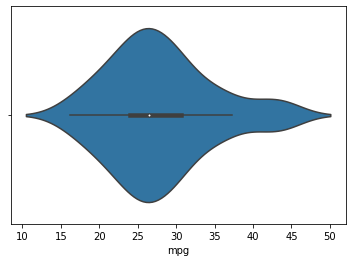

In [ ]:
# violinplot 그리기
sns.violinplot(data=df_europe, x="mpg")


### 산점도를 통한 범주형 데이터 표현

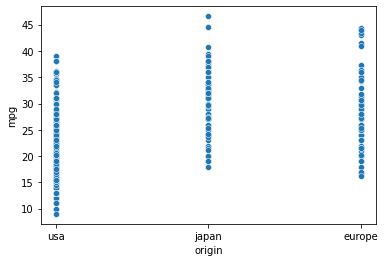

In [ ]:
# scatterplot 으로 범주형 변수 그리기
sns.scatterplot(data=df, x="origin", y="mpg")

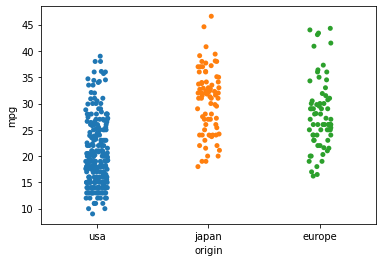

In [ ]:
# stripplot

sns.stripplot(data=df, x="origin", y="mpg")

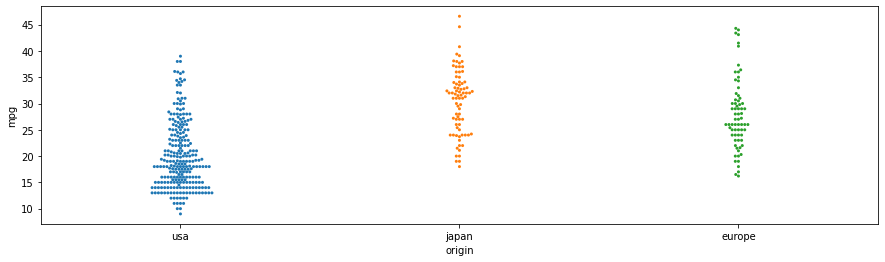

In [ ]:
# swarmplot
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="origin", y="mpg", size=3)

In [ ]:
# sns.catplot?

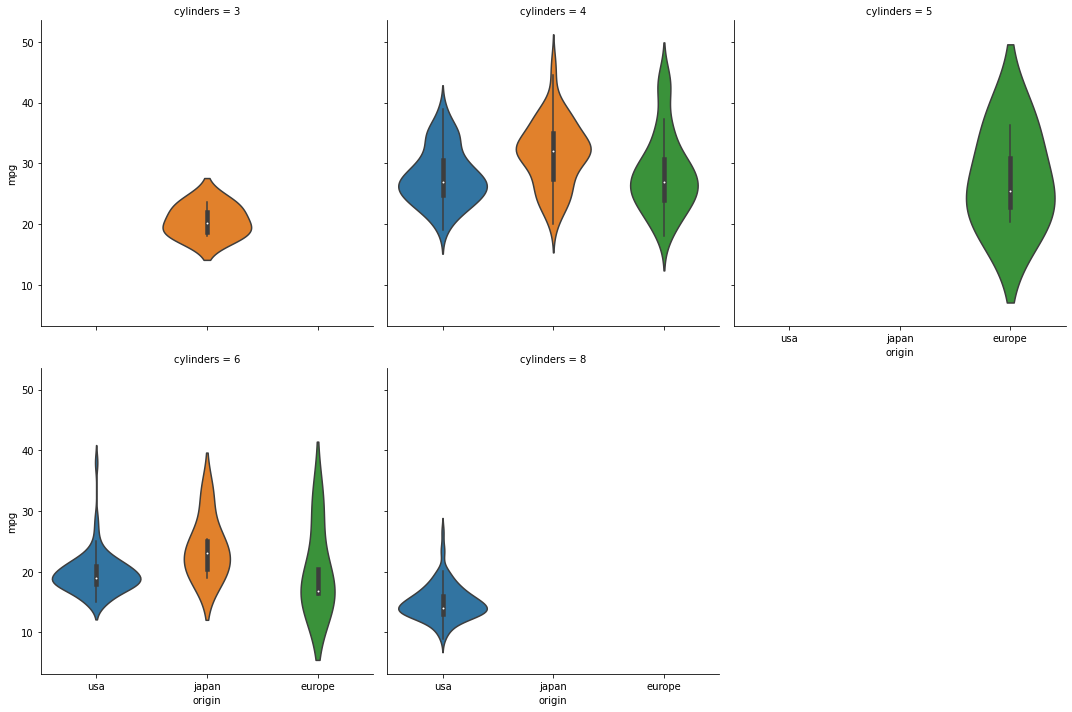

In [ ]:
# catplot
sns.catplot(data=df, x="origin", y="mpg", kind="violin", col="cylinders", col_wrap=3)

### catplot을 통한 범주형 데이터의 서브플롯 시각화

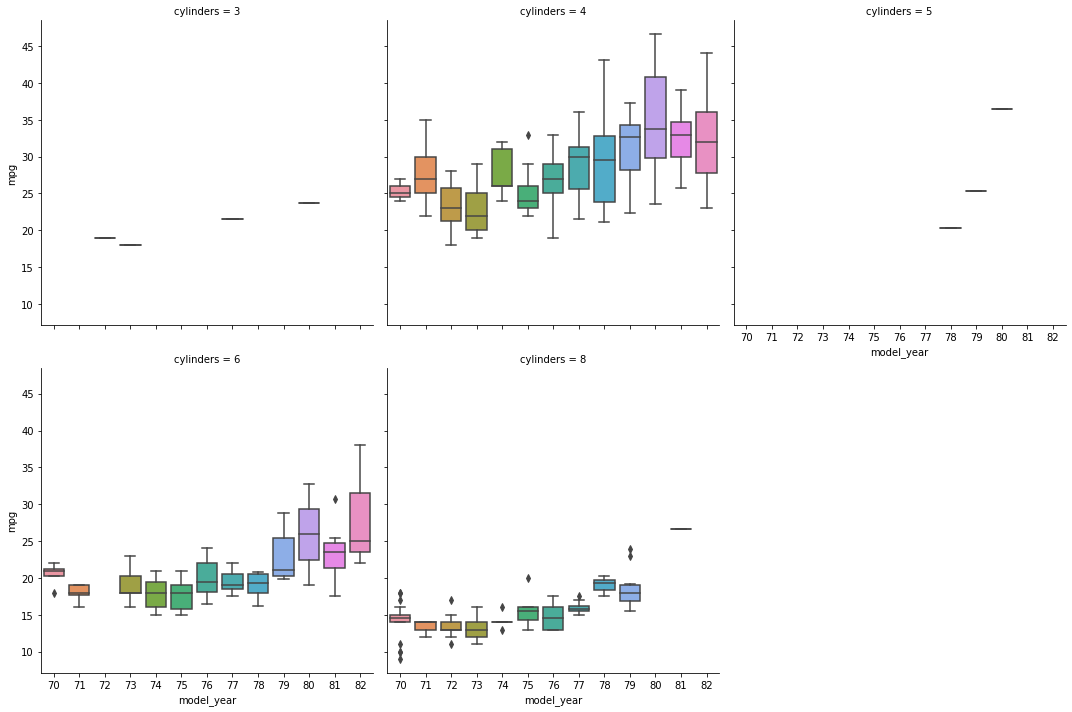

In [ ]:
# catplot 으로 boxplot그리기

sns.catplot(data=df, x="model_year", y="mpg", kind="box", col="cylinders", col_wrap=3)

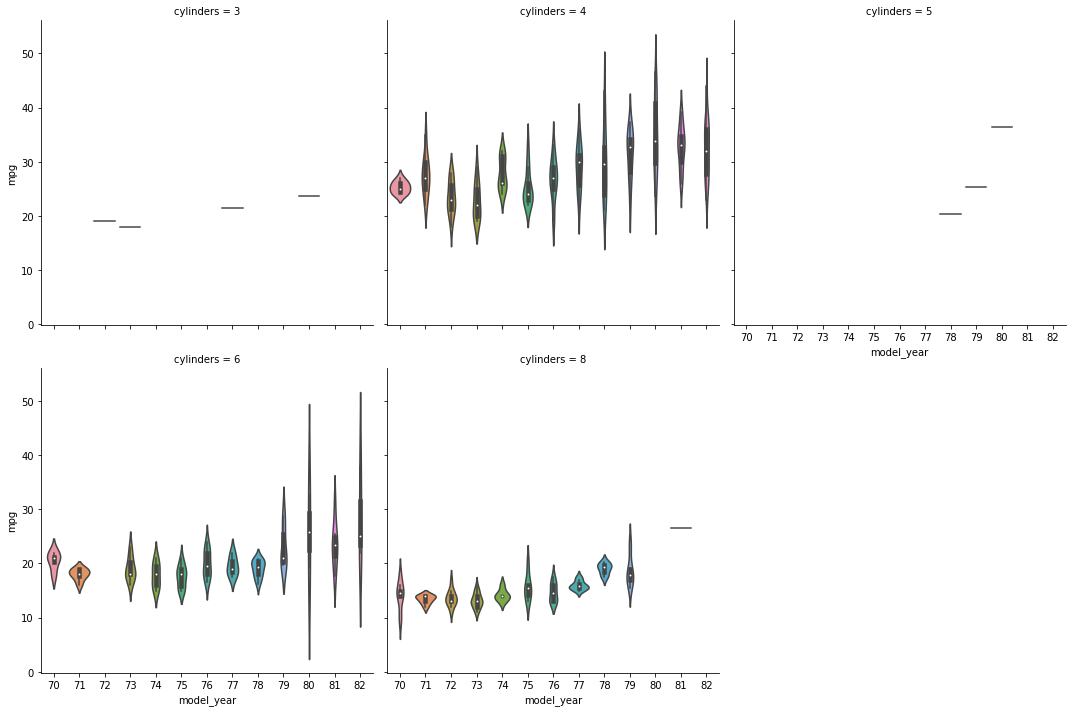

In [ ]:
# catplot 으로 violinplot그리기
sns.catplot(data=df, x="model_year", y="mpg", kind="violin", col="cylinders", col_wrap=3)


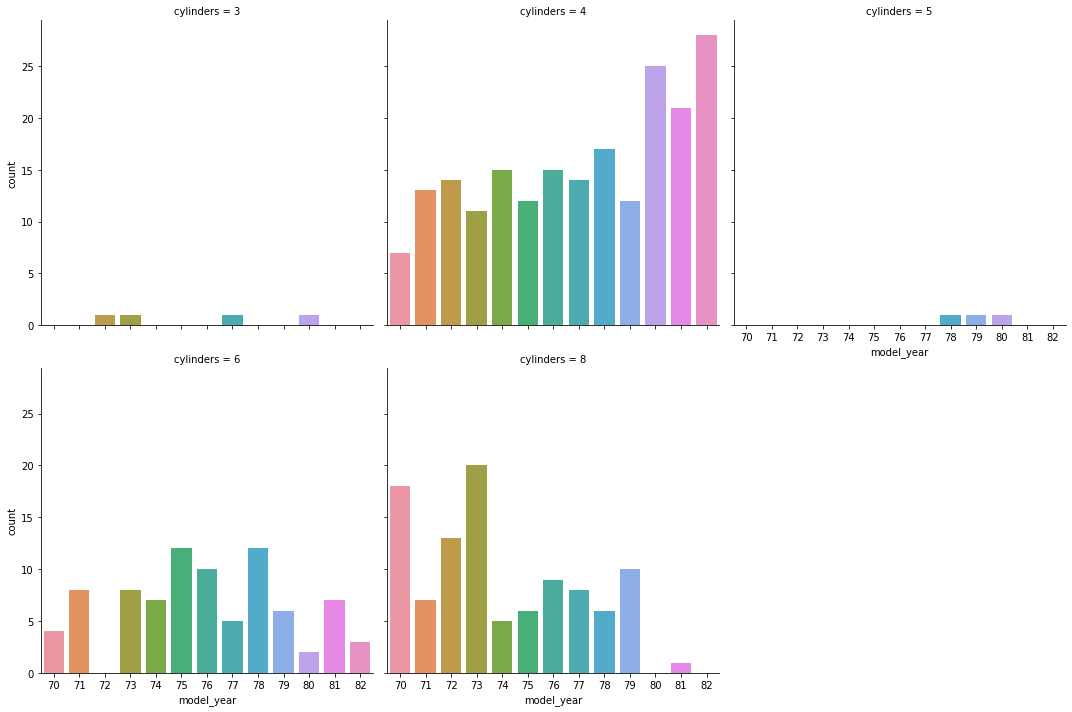

In [ ]:
# catplot 으로 countplot그리기

sns.catplot(data=df, x="model_year", kind="count", col="cylinders", col_wrap=3)

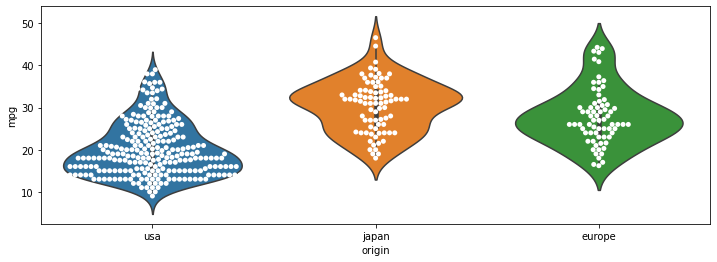

In [ ]:
plt.figure(figsize=(12, 4))
sns.violinplot(data=df, x='origin', y='mpg')
sns.swarmplot(data=df, x='origin', y='mpg', color='white')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


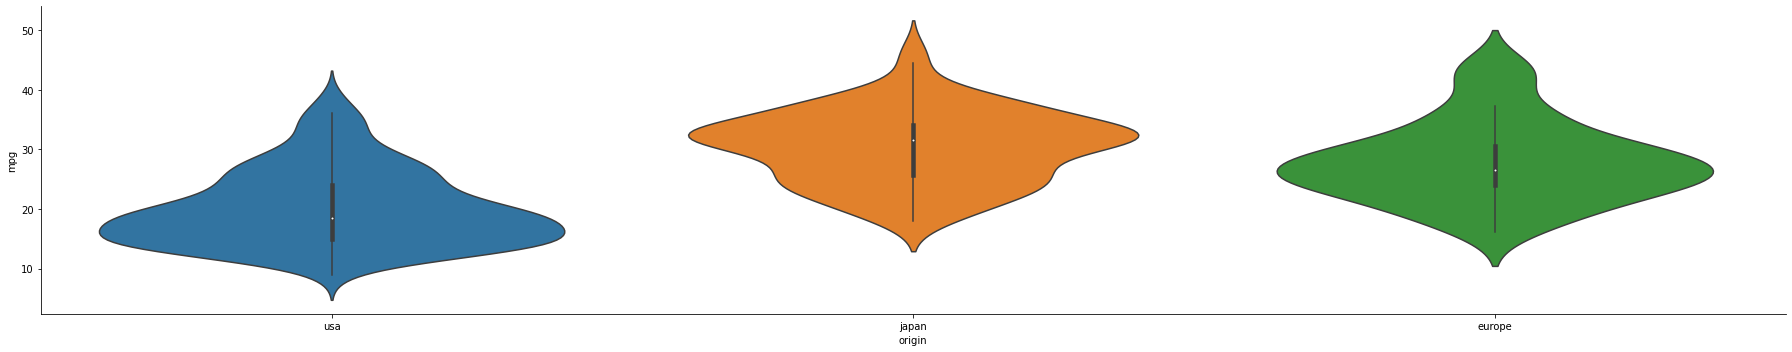

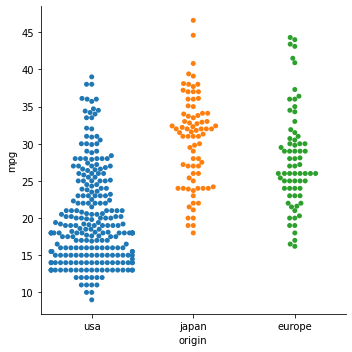

In [ ]:

sns.catplot(data=df, x="origin", y="mpg", kind="violin", aspect=5, hight=1)
sns.catplot(data=df, x="origin", y="mpg", kind="swarm")